# #  CHAFIKI FATIMA ELZAHRA

#  l'importation des librairies

In [392]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import * 
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC ,SVR
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import datasets, ensemble

#  Collecte des données

In [393]:
data = pd.read_csv("./zia.csv" ,delimiter=";")
data.insert(2, "teamSize",[5]*5+[7]+[5]*7+[7]+[5]*7 )
print(data.shape)
data


(21, 4)


,storyPoint,velocity,teamSize,Effort
0,156,2.7,5,63
1,202,2.5,5,92
2,173,3.3,5,56
3,331,3.8,5,86
4,124,4.2,5,32
5,339,3.6,7,91
6,97,3.4,5,35
7,257,3.0,5,93
8,84,2.4,5,36
9,211,3.2,5,62


#  Analyse des données 

In [394]:
data.isnull().sum() 

storyPoint    0
velocity      0
teamSize      0
Effort        0
dtype: int64

In [395]:
data.describe()

,storyPoint,velocity,teamSize,Effort
count,21.000000,21.000000,21.000000,21.000000
mean,163.714286,3.023810,5.190476,56.428571
std,82.743062,0.438069,0.601585,26.177417
min,62.000000,2.400000,5.000000,21.000000
25%,101.000000,2.800000,5.000000,35.000000
50%,137.000000,2.900000,5.000000,52.000000
75%,211.000000,3.200000,5.000000,80.000000
max,339.000000,4.200000,7.000000,112.000000


In [396]:
corelation = data.corr()

<AxesSubplot:>

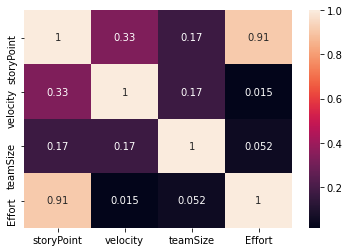

In [397]:
sns.heatmap(corelation , xticklabels=data.columns , yticklabels=data.columns , annot=True)

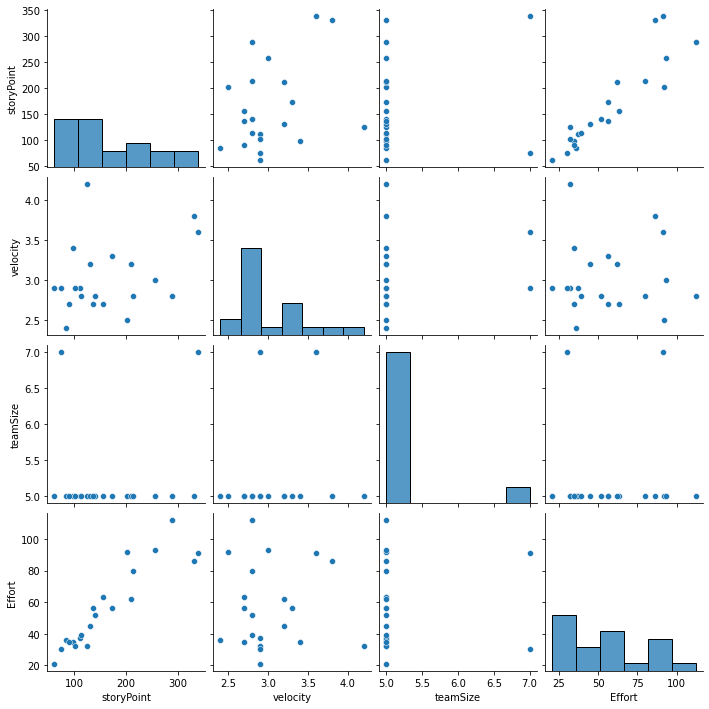

In [398]:
sns.pairplot(data)

# Préprocessing des données

In [399]:
X = data.iloc[:,0:3]
Y = data.iloc[:,3]



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [400]:
def trouver_donnees_importantes(X_train,TR):
    Filtre=VarianceThreshold(threshold=TR)
    Donnees_filtrees=Filtre.fit_transform(X_train)
    FS=list(Filtre.get_support())
    X=[]
    for i in range(0,len(FS)):
        if FS[i]==True:
            X += [i]
    return tuple(X)   


In [401]:
trouver_donnees_importantes(X_train,0.01)

(0, 1, 2)

#  Modélisation

In [402]:
# On va définir une fonction qui va calculer l'erreur pour l'évaluation

# calculer MRE
def MRE(y_test,y_predict):
    y_test = np.array(y_test)
    y_predict = np.array(y_predict)
    AbEi = np.abs(y_test-y_predict)
#     print(AbEi)
    MRE = AbEi / y_test
    return MRE

# calculer pred(25)
def pred_25(y_test,y_predict):
    mre =MRE(y_test,y_predict)
    s= 0 
    for i in mre :
        if i <= 0.25 :
            s += 1
    return s / len(mre)
            
# calculer le MMRE
def MMRE(y_test,y_predict) :
    mre =MRE(y_test,y_predict)
    return np.sum(mre) / len(mre)

    
    
    

# le modéle de regression linéaire 

In [403]:
regressor0 = LinearRegression().fit(X_train, y_train)

In [404]:
regressor0.score(X_train, y_train)
y_predict = regressor0.predict(X_test)


In [405]:
print("l'accuracy ----> ",pred_25(y_test,y_predict)*100)
print("l'erreur ------>" ,MMRE(y_test,y_predict))

l'accuracy ---->  71.42857142857143
l'erreur ------> 0.16822185375800586


#  le modéle de SVR

In [406]:
regressor1 = SVR(C=1000)
regressor1.fit(X_train, y_train)

SVR(C=1000)

In [407]:
regressor1.score(X_train, y_train)
y_predict1 = regressor1.predict(X_test)

In [408]:
print("l'accuracy ----> ",pred_25(y_test,y_predict)*100)
print("l'erreur ------>" ,MMRE(y_test,y_predict1))

l'accuracy ---->  71.42857142857143
l'erreur ------> 0.08693320168404169


#  le modéle d'arbre de décidion de régression


In [409]:
regressor2 = DecisionTreeRegressor(random_state=0)
regressor2.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [410]:
regressor2.score(X_train, y_train)
y_predict2 = regressor2.predict(X_test)

In [411]:
print("l'accuracy ----> ",pred_25(y_test,y_predict2)*100)
print("l'erreur ------>" ,MMRE(y_test,y_predict2))

l'accuracy ---->  100.0
l'erreur ------> 0.09529369440083725


In [412]:
Tst_MMRE = [MMRE(y_test,regressor0.predict(X_test)) ,MMRE(y_test,regressor1.predict(X_test)) ,MMRE(y_test,regressor2.predict(X_test)) ]
TR_MMRE = [MMRE(y_train,regressor0.predict(X_train)) ,MMRE(y_train,regressor1.predict(X_train)) ,MMRE(y_train,regressor2.predict(X_train)) ]
Tst_pred = [pred_25(y_test,regressor0.predict(X_test)) ,pred_25(y_test,regressor1.predict(X_test)) ,pred_25(y_test,regressor2.predict(X_test)) ]
TR_pred = [pred_25(y_train,regressor0.predict(X_train)) ,pred_25(y_train,regressor1.predict(X_train)) ,pred_25(y_train,regressor2.predict(X_train)) ]

dic ={ "TR.MMRE" : TR_MMRE  ,"TR.pred":TR_pred , "Tst.MMRE" :Tst_MMRE, "Tst.pred":Tst_pred}
pd.DataFrame(dic , index=["regression lineaire" , "SVR" ,"Decision tree regressor"])

,TR.MMRE,TR.pred,Tst.MMRE,Tst.pred
regression lineaire,0.114032,0.857143,0.168222,0.714286
SVR,0.106845,0.928571,0.086933,1.000000
Decision tree regressor,0.000000,1.000000,0.095294,1.000000


#  Amélioration de peformance

In [413]:
params = {
    "n_estimators": 1000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
  
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

In [414]:
reg.score(X_train, y_train)
y_predict2 = regr.predict(X_test)

In [415]:
print("l'accuracy ----> ",pred_25(y_test,y_predict2)*100)
print("l'erreur ------>" ,MMRE(y_test,y_predict2))

l'accuracy ---->  42.857142857142854
l'erreur ------> 0.28550488780446165
